In [1]:
#pip install vaderSentiment
#nltk.download('wordnet')
#nltk.download('punkt')
import pandas as pd
import os
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import normalize

path = "/Users/wacats_wh/Documents/Workarea/Jupyter Workarea"
os.chdir(path)

df = pd.read_csv('Dataset/fragrantica_perfume_review.csv')

In [2]:
df.shape

(200, 3)

In [3]:
df.head(1)

,web-scraper-order,web-scraper-start-url,review
0,1643477268-84,https://www.fragrantica.com/perfume/Jo-Malone-...,Jo Malone’s Wood Sage and Sea Salt Cologne cap...


In [4]:
# Before tokenizing & lemmatizing 'review' column
print(df.iloc[0]['review'])

Jo Malone’s Wood Sage and Sea Salt Cologne captures the spirited crisp of a north English coastline and its body of minerals, driftwood and saltwater wisps; creating a scent story as soothing as its inspiration. This is a fragrance that is essentially pink and gray in essence like the natural colour of sea salt and bedrock it beautifully emulates; emanating cool whiffs of briny air, sulfuric moisture of red algae, camphorous woods and stony edges... Truly, an imagining that note-wise may suggest a green aquatic but delightfully far and wide from that sort. It can be collectively likened to a creamy and cool spa treatment, raised by its minor hints of buchu leaf, rounded plum, dried fruit, giving the greater sum of its parts, sage, seawood, grapefruit, and ambrette a full radiance that is ethereal, peachy clean and ozonic. The sage, in particular, with its mentholated drift carries an uplifting weight to the saline heart, offering a natural earthy depth to the accord. Surely, this is an

In [5]:
# Declare sentiment analyzer helper functions
lemmatizer = WordNetLemmatizer()

def lemmatize(word):
    return lemmatizer.lemmatize(word)

def lemmatize_paragraph(paragraph):
    word_list = []
    tokens = word_tokenize(paragraph)
    for token in tokens:
        word_list.append(lemmatize(token))
    sentence = " ".join(word_list)
    return sentence

In [6]:
# Apply function 'lemmatize_paragraph' on all 'review' column
df['review'] = df['review'].apply(lemmatize_paragraph)

In [7]:
# After tokenizing & lemmatizing review column
print(df.iloc[0]['review'])

Jo Malone ’ s Wood Sage and Sea Salt Cologne capture the spirited crisp of a north English coastline and it body of mineral , driftwood and saltwater wisp ; creating a scent story a soothing a it inspiration . This is a fragrance that is essentially pink and gray in essence like the natural colour of sea salt and bedrock it beautifully emulates ; emanating cool whiff of briny air , sulfuric moisture of red algae , camphorous wood and stony edge ... Truly , an imagining that note-wise may suggest a green aquatic but delightfully far and wide from that sort . It can be collectively likened to a creamy and cool spa treatment , raised by it minor hint of buchu leaf , rounded plum , dried fruit , giving the greater sum of it part , sage , seawood , grapefruit , and ambrette a full radiance that is ethereal , peachy clean and ozonic . The sage , in particular , with it mentholated drift carry an uplifting weight to the saline heart , offering a natural earthy depth to the accord . Surely , t

In [8]:
# Define helper function for sentiment analyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [9]:
# See example of return value by sentiment analyzer score
print(sentiment_analyzer_scores(df.iloc[0]['review']))

{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.9945}


In [10]:
# Store sentiment scores of each row
score = []

for index, row in df.iterrows():
    score_dict = sentiment_analyzer_scores(row['review'])
    score.append(score_dict['compound'])

In [11]:
# Attach score into dataframe as new column 'sentiment_score'
df['sentiment_score'] = score

df.head(5)

,web-scraper-order,web-scraper-start-url,review,sentiment_score
0,1643477268-84,https://www.fragrantica.com/perfume/Jo-Malone-...,Jo Malone ’ s Wood Sage and Sea Salt Cologne c...,0.9945
1,1643477268-188,https://www.fragrantica.com/perfume/Jo-Malone-...,My favorite scent ! I actually ended up going ...,0.9955
2,1643477268-125,https://www.fragrantica.com/perfume/Jo-Malone-...,"I 'm a man in my late 30 's and , at my wife '...",0.9895
3,1643477268-144,https://www.fragrantica.com/perfume/Jo-Malone-...,This fragrance smell like salty skin after lea...,0.7702
4,1643477268-154,https://www.fragrantica.com/perfume/Jo-Malone-...,"Definitely unisex . I do n't get the sage , bu...",0.7423


<AxesSubplot:title={'center':'Histogram of Frequency against Sentiment Score of Jo Malone Wood Sage & Sea Salt'}, ylabel='Frequency'>

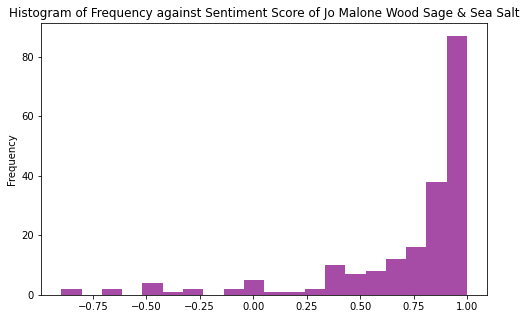

In [12]:
# Plot histogram to see distribution
df['sentiment_score'].plot.hist(
        title = "Histogram of Frequency against Sentiment Score of Jo Malone Wood Sage & Sea Salt",
        legend = False,
        bins = 20,
        #xlabel = 'Sentiment Score', xlabel not working :(
        alpha = 0.7,
        color = 'purple',
        figsize = (8, 5)
        )